<a href="https://colab.research.google.com/github/abhiramramesh422-code/IMDB-Movie-Review-Dataset/blob/main/imdb_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc


In [29]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("IMDB Dataset.csv")

print(df.head())
print(df['sentiment'].value_counts())


Saving IMDB Dataset.csv to IMDB Dataset (2).csv
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [32]:

X = df['review']
y = df['sentiment'].map({'positive':1, 'negative':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [30]:

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_tfidf, y_train)

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

<Figure size 700x500 with 0 Axes>

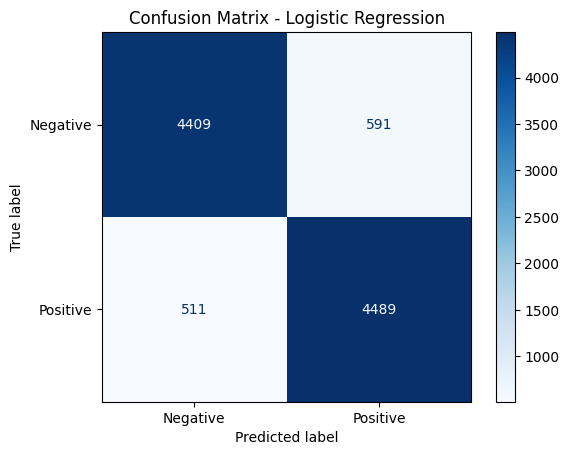

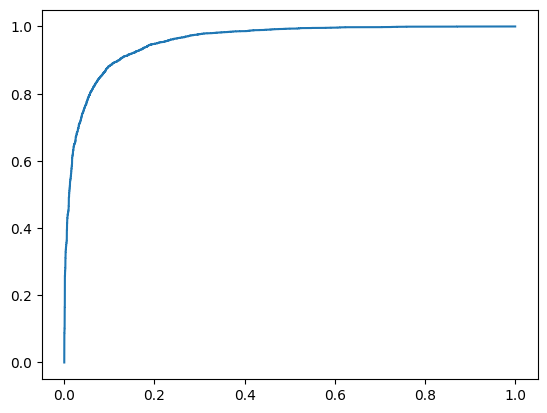

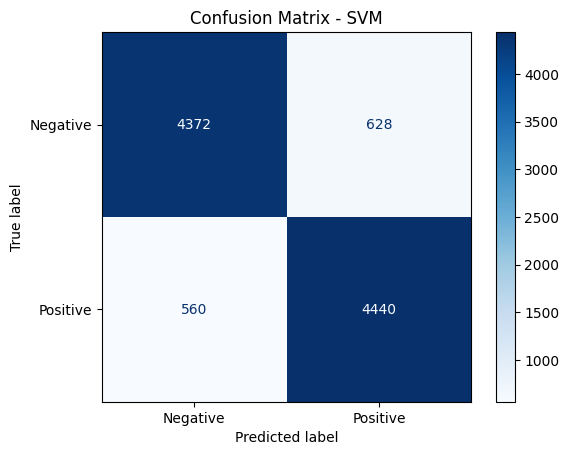

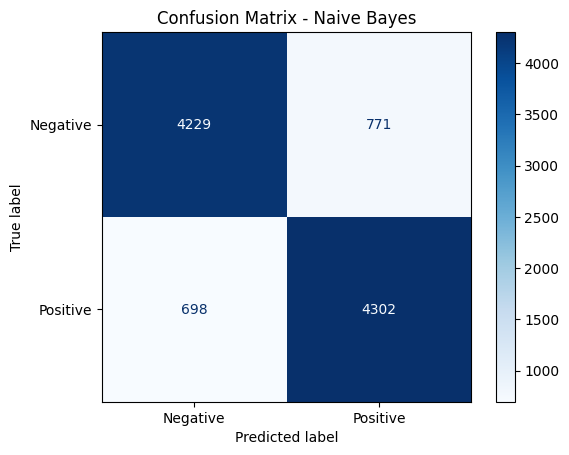

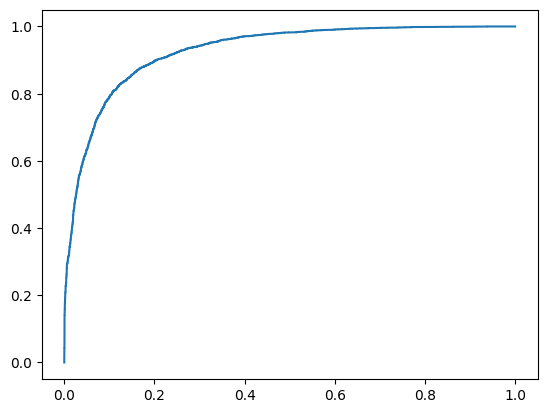

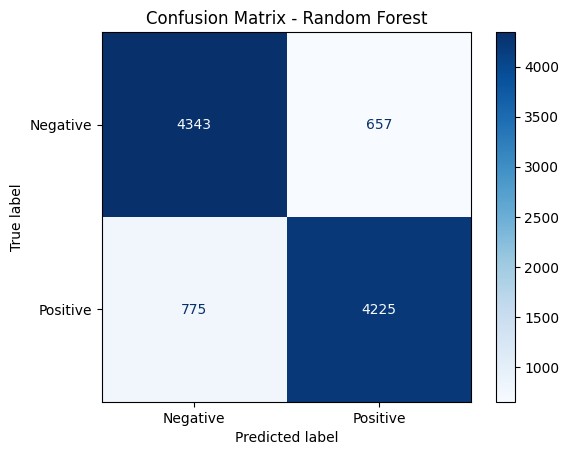

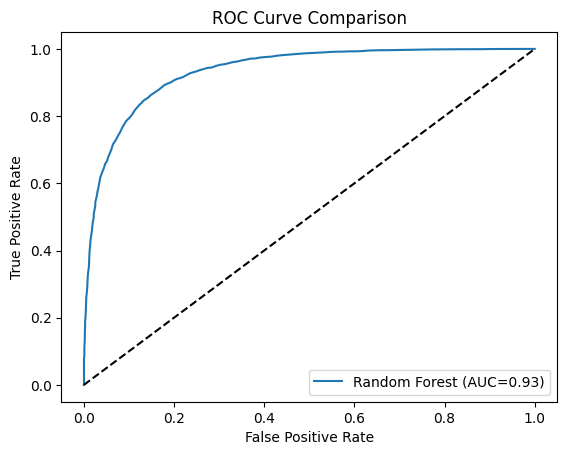

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.910525,0.889800,0.883661,0.897800,0.890675
1,SVM,0.927325,0.881200,0.876085,0.888000,0.882002
2,Naive Bayes,0.861225,0.853100,0.848019,0.860400,0.854165
3,Random Forest,1.000000,0.856800,0.865424,0.845000,0.855090


In [35]:
plt.figure(figsize=(7,5))
results = []
results.append(evaluate_model(log_reg, X_train_tfidf, y_train, X_test_tfidf, y_test, "Logistic Regression"))
results.append(evaluate_model(svm, X_train_tfidf, y_train, X_test_tfidf, y_test, "SVM", proba=False))
results.append(evaluate_model(nb, X_train_tfidf, y_train, X_test_tfidf, y_test, "Naive Bayes"))
results.append(evaluate_model(rf, X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest"))


plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

results_df = pd.DataFrame(results)
results_df


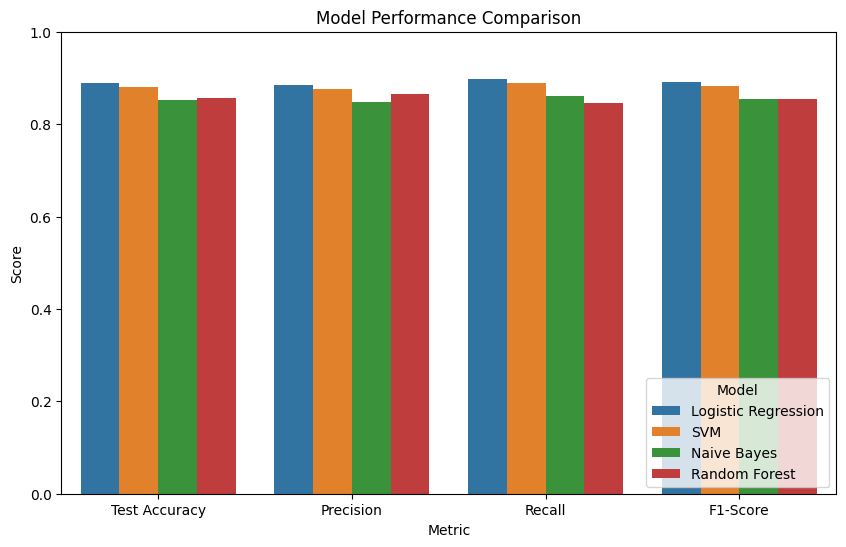

In [34]:


metrics_to_plot = ["Test Accuracy", "Precision", "Recall", "F1-Score"]

results_melted = results_df.melt(
    id_vars="Model",
    value_vars=metrics_to_plot,
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(10,6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model")
plt.title("Model Performance Comparison")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Model", loc='lower right')
plt.show()
